In [1]:
from google.colab.output import eval_js
# eval_js('google.colab.output.setIframeHeight("500")')
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/2023 Pharmahacks/figs/')

## Data Exploration
with raw IBS diet dataset

In [3]:
filename ="/content/drive/MyDrive/Colab Notebooks/2023 Pharmahacks/2023/data.csv"
ibs = pd.read_csv(filename)
ibs.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F13,F14,F15,F16,F17,F18,F19,F20,symptom_value,user_number
0,4,7,14,1,53,24,5,28,56,9,...,13,19,0,0,39,3,13,34,8.803009,0
1,0,12,0,0,35,10,0,12,42,6,...,17,14,11,13,18,3,10,16,0.000000,0
2,6,14,0,0,26,12,2,40,62,4,...,0,11,17,0,18,1,9,14,0.000000,0
3,3,13,11,1,35,16,5,49,24,0,...,13,14,0,0,31,2,11,26,0.000000,0
4,0,14,5,3,34,10,2,26,44,7,...,0,0,7,15,17,1,0,13,3.257174,0


In [4]:
filename="/content/drive/MyDrive/Colab Notebooks/2023 Pharmahacks/2023/food_hierarchy.csv"
hierarchy = pd.read_csv(filename)
hierarchy

,parent_food,child_food
0,F9,F15
1,F9,F6
2,F9,F11
3,F9,F7
4,F9,F1
5,F17,F1
6,F17,F6
7,F20,F3
8,F20,F4
9,F20,F14


In [5]:
## Range for each of the features
summary_stats = ibs.describe()
summary_stats.iloc[:,0:10]

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10
count,1186.000000,1186.000000,1186.000000,1186.000000,1186.000000,1186.000000,1186.000000,1186.000000,1186.000000,1186.000000
mean,3.742833,10.946880,8.036256,1.589376,33.398820,11.908938,3.345700,32.910624,42.559865,4.530354
std,3.530526,5.818902,4.857413,1.490059,11.095001,5.950440,2.325471,12.261584,11.636994,3.475946
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000
25%,0.000000,9.000000,6.000000,0.000000,26.000000,10.000000,2.000000,24.000000,35.000000,0.000000
50%,4.000000,12.000000,9.000000,1.000000,34.000000,13.000000,3.000000,33.000000,43.000000,5.000000
75%,6.000000,15.000000,12.000000,3.000000,41.000000,16.000000,5.000000,41.000000,51.000000,7.000000
max,16.000000,27.000000,23.000000,8.000000,62.000000,27.000000,12.000000,73.000000,75.000000,15.000000


In [6]:
summary_stats.iloc[:,11:21]

,F12,F13,F14,F15,F16,F17,F18,F19,F20,symptom_value
count,1186.000000,1186.000000,1186.000000,1186.000000,1186.000000,1186.000000,1186.000000,1186.000000,1186.000000,1186.000000
mean,8.016863,10.284992,10.983980,5.943508,9.495784,23.589376,1.745363,7.593592,22.887015,9.311673
std,6.236118,8.774612,7.439245,4.909408,7.322036,8.331275,1.446981,5.768832,9.225394,16.375864
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,1.000000,0.000000,16.000000,0.000000
50%,9.000000,13.000000,13.000000,7.000000,12.000000,24.000000,2.000000,9.000000,24.000000,0.000000
75%,13.000000,18.000000,16.000000,10.000000,15.000000,29.000000,3.000000,12.000000,30.000000,12.906920
max,24.000000,30.000000,29.000000,22.000000,28.000000,49.000000,7.000000,24.000000,47.000000,99.995380


<Axes: >

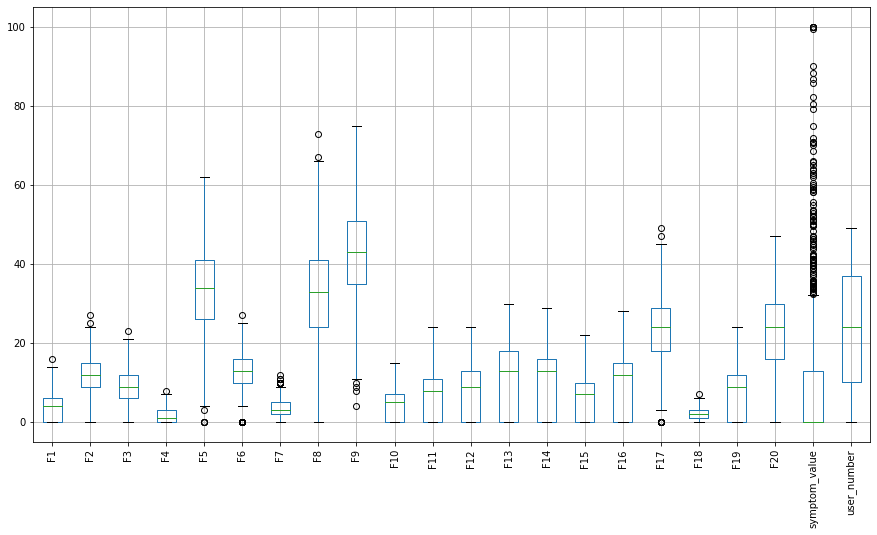

In [7]:
# eval_js('google.colab.output.setIframeHeight("400")')
## How are features distributed overall?
ibs.boxplot(figsize=(15,8), rot=90)

`symptom_value` is right-skewed with mean 0.

<Axes: >

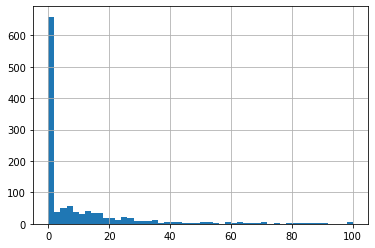

In [8]:
## histogram for symptom value
ibs['symptom_value'].hist(bins=50,)

In [9]:
## histogram for symptom value
print(ibs.loc[ibs['symptom_value'] != 0].shape)
print(ibs.loc[ibs['symptom_value'] == 0].shape)

(567, 22)
(619, 22)


The skewness and the fairly balanced distribution between examples that are above 0 `symptom_value` vs 0 `symptom_value` seems to suggest that we will not have trouble dealing with an unbalanced dataset. 

<Axes: >

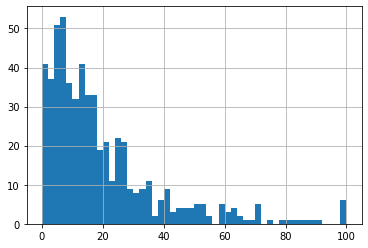

In [10]:
## histogram for symptom value (without 0s)
ibs_nonzero = ibs.loc[ibs['symptom_value'] != 0]
ibs_nonzero['symptom_value'].hist(bins=50)

There seems to be many data points for food combinations resulting in light to mild IBS symptoms. Minority of data points show there are few food combinations that cause severe IBS symptoms.

array([[<Axes: title={'center': 'F1'}, xlabel='[user_number]'>,
        <Axes: title={'center': 'F10'}, xlabel='[user_number]'>,
        <Axes: title={'center': 'F11'}, xlabel='[user_number]'>,
        <Axes: title={'center': 'F12'}, xlabel='[user_number]'>,
        <Axes: title={'center': 'F13'}, xlabel='[user_number]'>],
       [<Axes: title={'center': 'F14'}, xlabel='[user_number]'>,
        <Axes: title={'center': 'F15'}, xlabel='[user_number]'>,
        <Axes: title={'center': 'F16'}, xlabel='[user_number]'>,
        <Axes: title={'center': 'F17'}, xlabel='[user_number]'>,
        <Axes: title={'center': 'F18'}, xlabel='[user_number]'>],
       [<Axes: title={'center': 'F19'}, xlabel='[user_number]'>,
        <Axes: title={'center': 'F2'}, xlabel='[user_number]'>,
        <Axes: title={'center': 'F20'}, xlabel='[user_number]'>,
        <Axes: title={'center': 'F3'}, xlabel='[user_number]'>,
        <Axes: title={'center': 'F4'}, xlabel='[user_number]'>],
       [<Axes: title={'cen

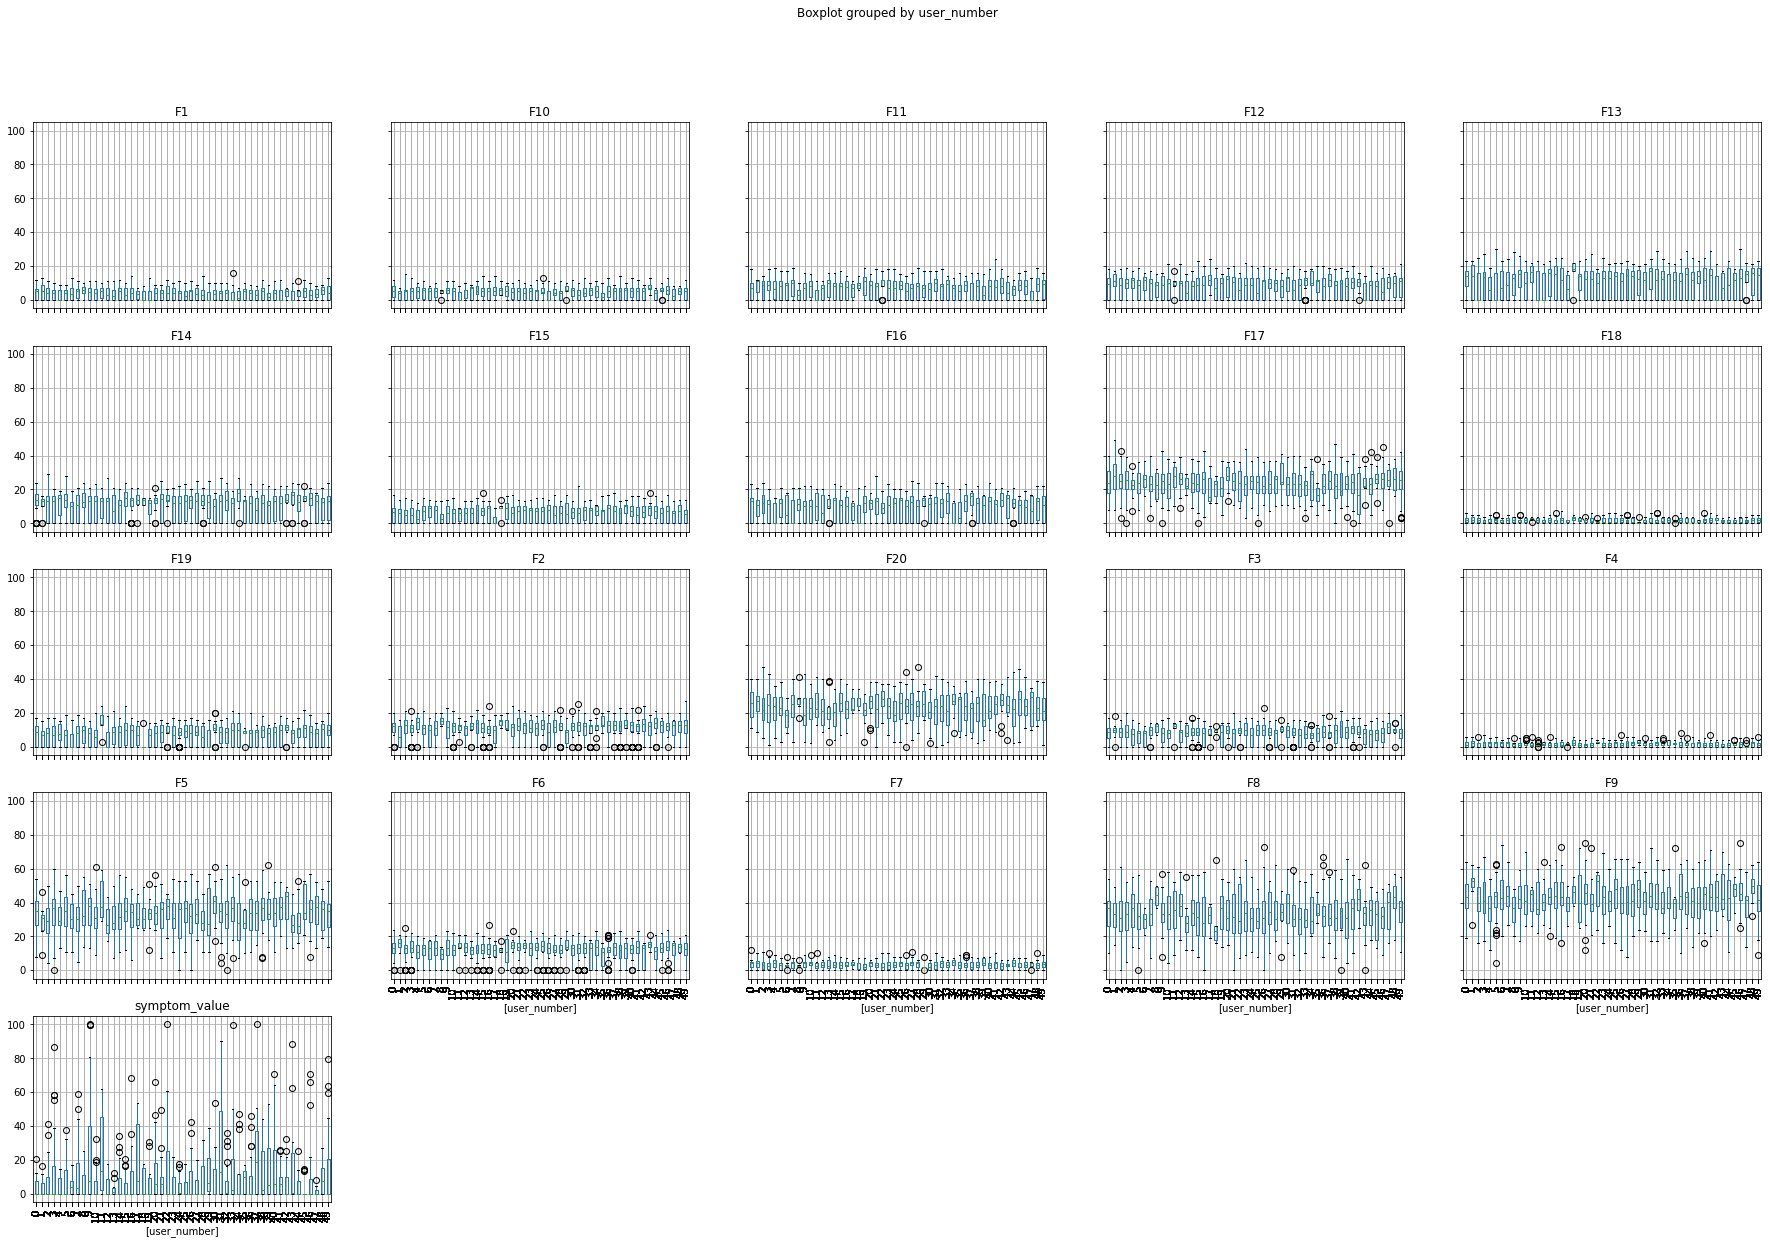

In [11]:
## boxplot by user
ibs.boxplot(figsize=(30,20), rot=90, by='user_number')

The distributions by unit show that 
- within a feature, the distribution is very similar between patients 
- Comparing across features, the distributions are different, but within the same degree of 10.

We could perform a log2(x/total + 1) transformation.

It would assume that with each entry the person eats the same amount of food. 


In [70]:
sns.pairplot(ibs.drop("symptom_value", axis=1), hue='user_number')

Output hidden; open in https://colab.research.google.com to view.

## Questions: 
1. Is it possible to train a model that predicts everyone's IBS symptoms? (Does this apply to only a subset of features or most features?) -- Nicolas M.

2. If 1. fails, then can we find groups of users that can produce high accuracy models? How many groups can we find? -- Me

For 1. We could normalize by columns and choose a simple ml model to test it out.

For 2. we could normalize by row and try to cluster each entry on a PCA or UMAP plot and get the distribution of users within each cluster.

In [89]:
## Normalize data by column besides the output 
ibs_data = ibs.drop(labels='user_number', axis=1)
sums = ibs_data.sum(0)
ibs_lognorm = np.log2(ibs_data.div(sums, axis='columns') + 1)
ibs_lognorm.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F12,F13,F14,F15,F16,F17,F18,F19,F20,symptom_value
0,0.001299,0.000778,0.002118,0.000765,0.001929,0.002449,0.001817,0.001035,0.001600,0.002415,...,0.002577,0.001537,0.002103,0.000000,0.000000,0.002010,0.002089,0.002081,0.001806,0.001150
1,0.000000,0.001333,0.000000,0.000000,0.001274,0.001021,0.000000,0.000443,0.001200,0.001610,...,0.000000,0.002009,0.001550,0.002250,0.001664,0.000928,0.002089,0.001601,0.000850,0.000000
2,0.001949,0.001555,0.000000,0.000000,0.000947,0.001225,0.000727,0.001478,0.001771,0.001074,...,0.000000,0.000000,0.001218,0.003475,0.000000,0.000928,0.000697,0.001441,0.000744,0.000000
3,0.000975,0.001444,0.001664,0.000765,0.001274,0.001633,0.001817,0.001810,0.000686,0.000000,...,0.002426,0.001537,0.001550,0.000000,0.000000,0.001598,0.001393,0.001761,0.001381,0.000000
4,0.000000,0.001555,0.000757,0.002294,0.001238,0.001021,0.000727,0.000961,0.001257,0.001878,...,0.000000,0.000000,0.000000,0.001432,0.001920,0.000876,0.000697,0.000000,0.000691,0.000425


<Axes: >

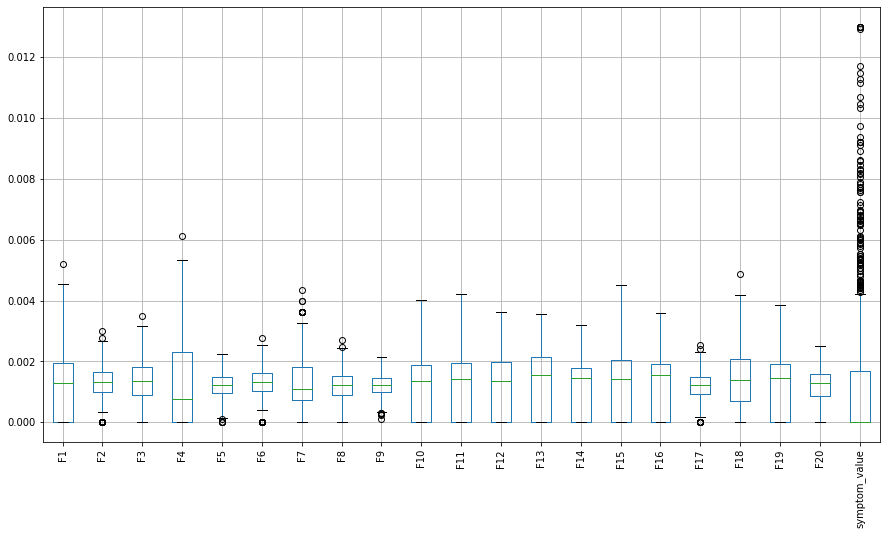

In [90]:
# eval_js('google.colab.output.setIframeHeight("400")')
## How are features distributed overall?
ibs_lognorm.boxplot(figsize=(15,8), rot=90)

In [95]:
## Include id and user_number columns
ibs_lognorm['id'] = np.arange(len(ibs_lognorm))
ibs_lognorm['user_number'] = ibs['user_number']
ibs_lognorm.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F14,F15,F16,F17,F18,F19,F20,symptom_value,id,user_number
0,0.001299,0.000778,0.002118,0.000765,0.001929,0.002449,0.001817,0.001035,0.001600,0.002415,...,0.002103,0.000000,0.000000,0.002010,0.002089,0.002081,0.001806,0.001150,0,0
1,0.000000,0.001333,0.000000,0.000000,0.001274,0.001021,0.000000,0.000443,0.001200,0.001610,...,0.001550,0.002250,0.001664,0.000928,0.002089,0.001601,0.000850,0.000000,1,0
2,0.001949,0.001555,0.000000,0.000000,0.000947,0.001225,0.000727,0.001478,0.001771,0.001074,...,0.001218,0.003475,0.000000,0.000928,0.000697,0.001441,0.000744,0.000000,2,0
3,0.000975,0.001444,0.001664,0.000765,0.001274,0.001633,0.001817,0.001810,0.000686,0.000000,...,0.001550,0.000000,0.000000,0.001598,0.001393,0.001761,0.001381,0.000000,3,0
4,0.000000,0.001555,0.000757,0.002294,0.001238,0.001021,0.000727,0.000961,0.001257,0.001878,...,0.000000,0.001432,0.001920,0.000876,0.000697,0.000000,0.000691,0.000425,4,0


In [27]:
def lognorm (dataset): 
  dataset_no_users = dataset.drop(labels='user_number', axis=1)
  sums = dataset_no_users.sum(0)
  dataset_no_users_lognorm = np.log2(dataset_no_users.div(sums, axis='columns') + 1)
  dataset_no_users_lognorm['id'] = np.arange(len(dataset_no_users_lognorm))
  dataset_no_users_lognorm['user_number'] = dataset['user_number']
  return dataset_no_users_lognorm

### PCA on raw dataset

Find the maximum amount of variance (principal components)


In [93]:
## PCA - clusters
import sklearn as sk

pca = sk.decomposition.PCA(n_components=15, copy=True, random_state=42)
pca.fit(ibs.drop(['user_number','symptom_value'], axis=1))

PCA(n_components=15, random_state=42)

In [94]:
print(pca.explained_variance_)
df_pca = pd.DataFrame(
    {'PC': np.arange(15),
     'eigenvalues': pca.explained_variance_,
     'ratio': pca.explained_variance_ratio_,
     'cumulative_sum': np.cumsum(pca.explained_variance_),
    })
df_pca

[194.16701614 163.82314664 161.64004027 109.72693313  77.3118288
  60.23422972  53.59785844  37.5380611   31.47832222  25.41410278
  20.9415674   18.41053311  14.22589203  10.78715807   8.10144119]


,PC,eigenvalues,ratio,cumulative_sum
0,0,194.167016,0.193830,194.167016
1,1,163.823147,0.163539,357.990163
2,2,161.640040,0.161359,519.630203
3,3,109.726933,0.109536,629.357136
4,4,77.311829,0.077178,706.668965
5,5,60.234230,0.060130,766.903195
6,6,53.597858,0.053505,820.501053
7,7,37.538061,0.037473,858.039114
8,8,31.478322,0.031424,889.517436
9,9,25.414103,0.025370,914.931539


<Axes: xlabel='PC'>

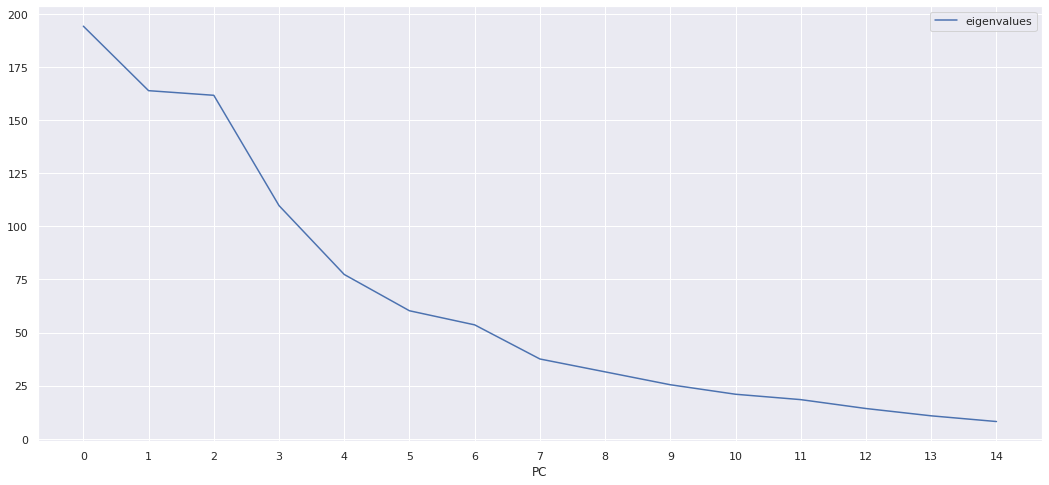

In [95]:
df_pca.plot(x='PC', y='eigenvalues', xticks=df_pca.PC)

The non-normalized dataset produces 8 principal components the greater than 0.01 ratio of difference between eigenvalues.

<Axes: >

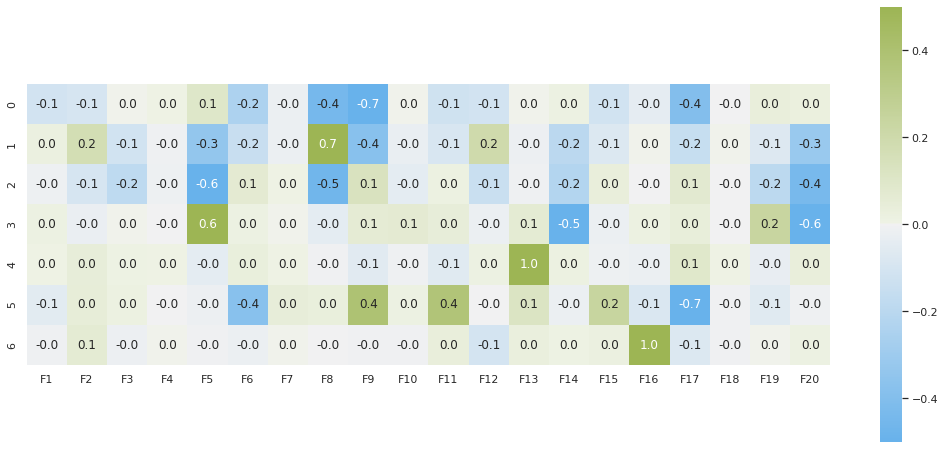

In [96]:
cmap = sns.diverging_palette(240,100, as_cmap=True, l=70.0)
sns.set(rc={"figure.figsize":(18, 8)})
sns.heatmap(pd.DataFrame(pca.components_).iloc[0:7,],annot=True,cmap=cmap,vmin=-0.5, vmax=0.5, fmt=".1f",square=True,
            xticklabels=pca.feature_names_in_)

List of food groups that explain variation in the dataset strongly:
F5, F8, F9, F8, F14, F17, F20

List of food groups that explain variation in the dataset weakly:
F6, F11, F13, F16, F19, 

### PCA on normalized dataset

Find the maximum amount of variance (principal components)


In [67]:
## PCA - clusters
import sklearn as sk

ibs_norm =lognorm(ibs)
pca = sk.decomposition.PCA(n_components=10, copy=True, random_state=42)
pca.fit(ibs_norm.drop(['id','user_number','symptom_value'], axis=1))

PCA(n_components=10, random_state=42)

<Axes: >

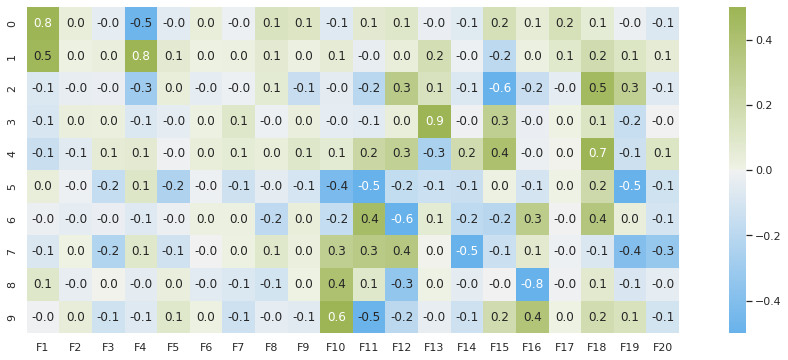

In [68]:
cmap = sns.diverging_palette(240,100, as_cmap=True, l=70.0)
sns.set(rc={"figure.figsize":(18, 6)})
sns.heatmap(pd.DataFrame(pca.components_),annot=True,cmap=cmap,vmin=-0.5, vmax=0.5, fmt=".1f",square=True,
            xticklabels=pca.feature_names_in_)

List of food groups that explain variation in the dataset strongly:
F1, F4, F13, F15, F18

List of food groups that explain variation in the dataset weakly:
F11, F12, F16 

In [73]:
print(pca.explained_variance_)
pd.DataFrame(
    {'PC': np.arange(10),
     'eigenvalues': pca.explained_variance_,
     'ratio': pca.explained_variance_ratio_,
     'cumulative_sum': np.cumsum(pca.explained_variance_),
    })

[1.44065342e-06 1.31586373e-06 1.12077118e-06 1.08552774e-06
 9.89494338e-07 9.51421571e-07 9.37884791e-07 9.04907621e-07
 8.73400647e-07 8.58182000e-07]


,PC,eigenvalues,ratio,cumulative_sum
0,0,1.440653e-06,0.104981,0.000001
1,1,1.315864e-06,0.095887,0.000003
2,2,1.120771e-06,0.081671,0.000004
3,3,1.085528e-06,0.079103,0.000005
4,4,9.894943e-07,0.072105,0.000006
5,5,9.514216e-07,0.069330,0.000007
6,6,9.378848e-07,0.068344,0.000008
7,7,9.049076e-07,0.065941,0.000009
8,8,8.734006e-07,0.063645,0.000010
9,9,8.581820e-07,0.062536,0.000010


When normalized the there is no variation that principal components are able to capture. Therefore the original values are able to capture the variation better.

### SparcePCA on normalized dataset

Find the maximum amount of variance (principal components)


In [90]:
## PCA - clusters
import sklearn as sk

ibs_norm =lognorm(ibs)
pca = sk.decomposition.SparsePCA(n_components=10, random_state=42)
pca.fit(ibs_norm.drop(['id','user_number','symptom_value'], axis=1))

SparsePCA(n_components=10, random_state=42)

<Axes: >

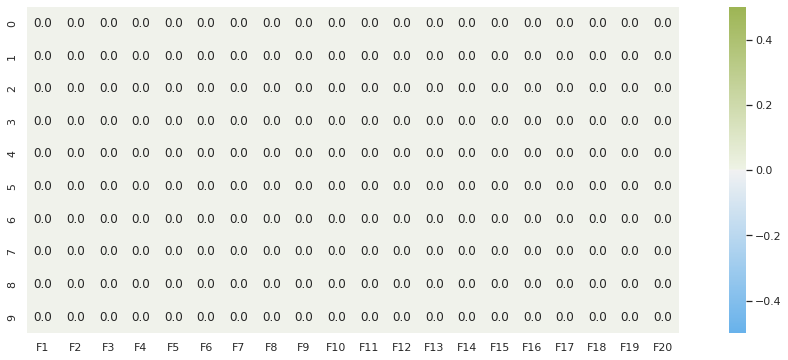

In [91]:
cmap = sns.diverging_palette(240,100, as_cmap=True, l=70.0)
sns.set(rc={"figure.figsize":(18, 6)})
sns.heatmap(pd.DataFrame(pca.components_),annot=True,cmap=cmap,vmin=-0.5, vmax=0.5, fmt=".1f",square=True,
            xticklabels=pca.feature_names_in_)

### Clustering each entry 

## Model

### First iteration keeping all features

In [132]:
X = ibs.drop(['symptom_value', 'user_number'], axis=1)
y = ibs['symptom_value']

X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.3, random_state=42)

In [135]:
model = sk.linear_model.SGDRegressor().fit(X_train, y_train)

In [136]:
model.coef_ #number of features

array([ 1.91817276e+09, -4.82787817e+09, -3.53769379e+10,  1.99333042e+10,
       -6.77030853e+09, -1.02170131e+10,  2.41715751e+09,  4.84828614e+10,
        1.64188082e+09, -3.17318567e+10, -1.02363283e+10,  3.80559071e+09,
        1.98240545e+09, -6.79582108e+10, -1.91405267e+10, -9.05184992e+09,
       -3.28072183e+10, -1.68408493e+10, -1.95759382e+10, -1.38692264e+10])

In [129]:
scores = sk.model_selection.cross_val_score(model, X_train, y_train, cv=5)
scores

array([ 0.09368567,  0.02462454, -0.22048505,  0.03844664, -0.07216424])

In [120]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

-8938272828394060120064.00 accuracy with a standard deviation of 5256270865232159571968.00


### Second iteration with features selected from PCA analysis


In [121]:
ibs_features = ibs.drop(['symptom_value', 'user_number'], axis=1)
ibs_features = ibs_features[['F5', 'F8', 'F9', 'F8', 'F14', 'F17', 'F20', 'F6', 'F11', 'F13', 'F16', 'F19']]
ibs_features.head()
y = ibs['symptom_value']

X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.3, random_state=42)

In [123]:
model = sk.linear_model.SGDRegressor().fit(X_train, y_train)

In [124]:
model.coef_ #number of features

array([ 6.14803764e+09,  1.16512438e+10,  9.93678852e+09, -3.18309523e+10,
        6.41664127e+10,  4.18624575e+10,  1.68627970e+10,  4.58802678e+10,
       -1.56260648e+10,  6.10716985e+10,  2.52925070e+10,  1.00634005e+10,
       -1.10826522e+09, -7.95881120e+09,  3.77376260e+10, -1.05841142e+10,
       -1.06090310e+09,  8.79217772e+08,  3.98680885e+09,  1.76974111e+10])

In [125]:
scores = sk.model_selection.cross_val_score(model, X_train, y_train, cv=5)
scores

array([-1.75515441e+22, -4.94320889e+21, -1.97249541e+22, -3.33631920e+21,
       -1.11668943e+22])

In [126]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

-11344584121383829635072.00 accuracy with a standard deviation of 6540618307372286214144.00


Which features related to which pcs are significant for grouping the samples?

In [ ]:
## PCA - features

### Third iteration with XGBoost

## Session Info

In [3]:
!python --version
!pip install session-info
import session_info

Python 3.9.16
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.5/63.5 KB 4.1 MB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8042 sha256=29354ee7056d6c1eb4444f7b13c8eef1cc5251a845ace57b77febf5d47a7b11c
  Stored in directory: /root/.cache/pip/wheels/d4/fc/2e/00ca60bac7954b84907efd41baa9b4853500eaeec4228410c6
Successfully built session-info


In [4]:
session_info.show()